In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../Data/Hotels_Best_Discount.csv")
X = df[["Snapshot Date", "Checkin Date" , "DayDiff" , "WeekDay" , "Hotel_Encoded_Name"]]
y = df["Discount Code"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**What is Random Forest?**

Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It works by training each tree on a random subset of the data and using majority voting (for classification). This method enhances stability, handles missing data well, and reduces the risk of overfitting compared to a single decision tree.

___
**Random Forest Hyperparameter Overview:**
- n_estimators – Number of trees in the forest.
- max_depth – Maximum depth of each tree (None = unlimited).
- min_samples_split – Minimum samples required to split a node.
- min_samples_leaf – Minimum samples required in a leaf node.
- bootstrap – Whether to sample data with replacement.








In [9]:
param_grid = {
    "n_estimators": [50, 100, 200],  # default=100
    "max_depth": [10, 20, None],  # default=None
    "min_samples_split": [2, 5, 10],  # default=2
    "min_samples_leaf": [1, 5],  # default=1
    "bootstrap": [True, False]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

print("\nTop 5 Random Forest Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

print("\nWorst 5 Random Forest Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)


Top 5 Random Forest Models (based on validation accuracy):
Model 95: Accuracy=0.7277, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Model 94: Accuracy=0.7271, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model 96: Accuracy=0.7262, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Model 99: Accuracy=0.7215, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Model 98: Accuracy=0.7207, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Worst 5 Random Forest Models (based on validation accuracy):
Model 17: Accuracy=0.5008, Params={'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Model 4: Accuracy=0.5004, P

**We fount ou that:**
- 'n_estimators' will keep the same
- 'max_depth better to be higher then 20
- 'min_samples_split' better to be higer then 2
- 'min_samples_leaf' better to be lower then 5
- 'bootstrap' better to be False


In [10]:
param_grid = {
    "n_estimators": [50, 100, 200],  # default=100
    "max_depth": [30, None],  # default=None
    "min_samples_split": [3, 5, 8],  # default=2
    "min_samples_leaf": [1, 3],  # default=1
    "bootstrap": [False]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

print("\nTop 5 Random Forest Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

print("\nWorst 5 Random Forest Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)


Top 5 Random Forest Models (based on validation accuracy):
Model 4: Accuracy=0.7288, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model 5: Accuracy=0.7283, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Model 23: Accuracy=0.7276, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Model 22: Accuracy=0.7271, Params={'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model 6: Accuracy=0.7268, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Worst 5 Random Forest Models (based on validation accuracy):
Model 17: Accuracy=0.7163, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Model 16: Accuracy=0.7160, Params={'boo

**We fount ou that:**
- 'n_estimators' will keep the same
- 'max_depth better to be not None
- 'min_samples_split' better to be close to 5
- 'min_samples_leaf' better to be lower then 3


In [11]:
param_grid = {
    "n_estimators": [50, 100, 200],  # default=100
    "max_depth": [30, 25],  # default=None
    "min_samples_split": [4, 5, 6],  # default=2
    "min_samples_leaf": [1, 2],  # default=1
    "bootstrap": [False]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

print("\nTop 5 Random Forest Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

print("\nWorst 5 Random Forest Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)


Top 5 Random Forest Models (based on validation accuracy):
Model 7: Accuracy=0.7297, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
Model 8: Accuracy=0.7292, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Model 4: Accuracy=0.7289, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model 22: Accuracy=0.7286, Params={'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model 5: Accuracy=0.7283, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Worst 5 Random Forest Models (based on validation accuracy):
Model 33: Accuracy=0.7211, Params={'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Model 31: Accuracy=0.7210, Params={'bootstrap

**We fount ou that:**
- 'n_estimators' will try more now to see what happens
- 'max_depth better to be 30 or maybe more
- 'min_samples_split' better to be 5 or 6 
- 'min_samples_leaf' better to be 1 the default value


In [12]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],  # default=100
    "max_depth": [30, 35],  # default=None
    "min_samples_split": [5, 6],  # default=2
    "bootstrap": [False]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 Random Forest Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)


Top 5 Random Forest Models (based on validation accuracy):
Model 14: Accuracy=0.7307, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 100}
Model 5: Accuracy=0.7297, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_split': 6, 'n_estimators': 50}
Model 13: Accuracy=0.7293, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 50}
Model 6: Accuracy=0.7292, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_split': 6, 'n_estimators': 100}
Model 16: Accuracy=0.7291, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 300}

Test Accuracy of Best Model: 0.7770

Best Hyperparameters Found:
{'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 100}


**We fount ou that:**
- 'n_estimators' is not really changes a lot so we drop 200
- 'max_depth better to keep with the same options because they both not bad and we add 33 also to try
- 'min_samples_split' better to be 6 


In [13]:
param_grid = {
    "n_estimators": [50, 100, 300],  # default=100
    "max_depth": [30, 35, 33],  # default=None
    "min_samples_split": [6],  # default=2
    "bootstrap": [False]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 Random Forest Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)


Top 5 Random Forest Models (based on validation accuracy):
Model 5: Accuracy=0.7307, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 100}
Model 1: Accuracy=0.7297, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_split': 6, 'n_estimators': 50}
Model 4: Accuracy=0.7293, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 50}
Model 8: Accuracy=0.7293, Params={'bootstrap': False, 'max_depth': 33, 'min_samples_split': 6, 'n_estimators': 100}
Model 2: Accuracy=0.7292, Params={'bootstrap': False, 'max_depth': 30, 'min_samples_split': 6, 'n_estimators': 100}

Test Accuracy of Best Model: 0.7770

Best Hyperparameters Found:
{'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 100}


In [ ]:

y_pred_proba = best_rf.predict_proba(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  
precision = np.diag(conf_matrix) / (np.diag(conf_matrix) + fp)
recall = np.diag(conf_matrix) / (np.diag(conf_matrix) + fn)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")


print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nFalse Positives (FP) per class:")
print(fp)
print("\nFalse Negatives (FN) per class:")
print(fn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nBest Hyperparameters Found:")
print(best_rf_params)


Test Accuracy: 0.7770
ROC AUC Score: 0.9288

False Positives (FP) per class:
[1227 1567 1330  661]

False Negatives (FN) per class:
[1240 1419 1205  921]

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78      5609
           2       0.78      0.79      0.78      6830
           3       0.77      0.79      0.78      5773
           4       0.78      0.72      0.75      3248

    accuracy                           0.78     21460
   macro avg       0.78      0.77      0.77     21460
weighted avg       0.78      0.78      0.78     21460


Best Hyperparameters Found:
{'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 100}


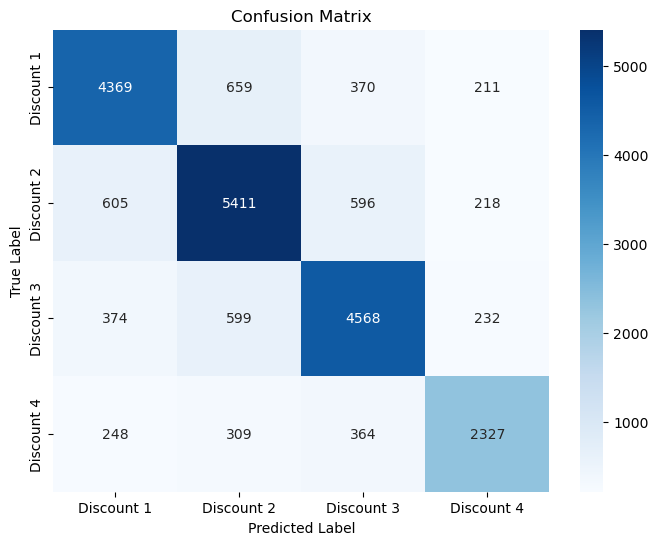

In [15]:
classes = [f"Discount {i}" for i in range(1, len(conf_matrix) + 1)]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

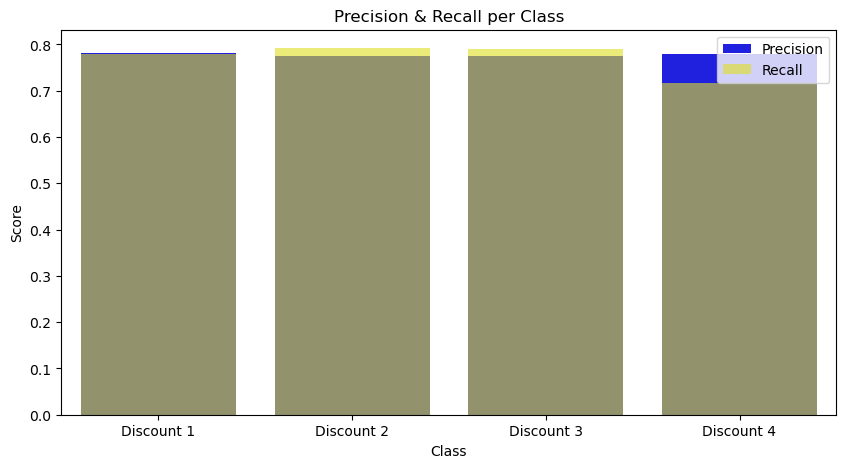

In [16]:
df_metrics = pd.DataFrame({"Class": classes, "Precision": precision, "Recall": recall})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Precision", data=df_metrics, color="blue", label="Precision")
sns.barplot(x="Class", y="Recall", data=df_metrics, color="yellow", alpha=0.6, label="Recall")
plt.ylabel("Score")
plt.title("Precision & Recall per Class")
plt.legend()
plt.show()

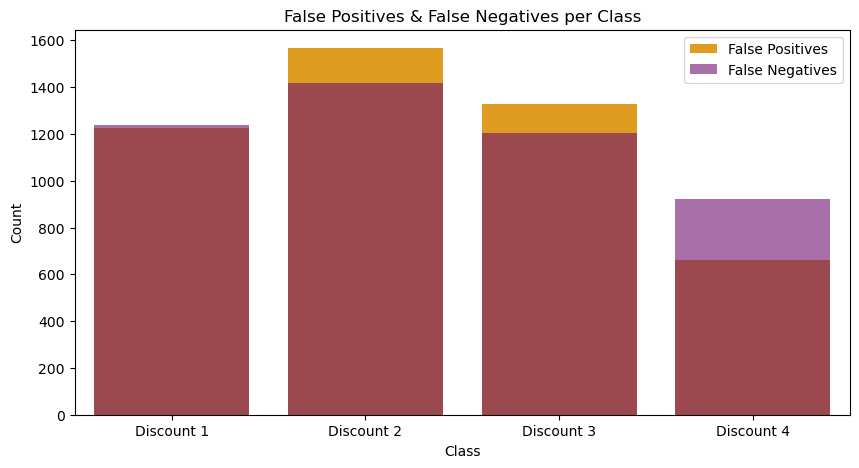

In [17]:
df_fp_fn = pd.DataFrame({"Class": classes, "False Positives": fp, "False Negatives": fn})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="False Positives", data=df_fp_fn, color="orange", label="False Positives")
sns.barplot(x="Class", y="False Negatives", data=df_fp_fn, color="purple", alpha=0.6, label="False Negatives")
plt.ylabel("Count")
plt.title("False Positives & False Negatives per Class")
plt.legend()
plt.show()

In [20]:
param_grid = {
    "max_depth": [35],  # default=None
    "min_samples_split": [6],  # default=2
    "bootstrap": [False , True]  # default=True
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_2_models = results_df.iloc[:2][["mean_test_score", "params"]]

print("Compare to find out how bootstrap affects the model:")
for idx, row in top_2_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_rf = grid_search.best_estimator_
best_rf_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of Best Model: {test_accuracy:.4f}")
print("\nBest Hyperparameters Found:")
print(best_rf_params)

Compare to find out how bootstrap affects the model:
Model 1: Accuracy=0.7307, Params={'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6}
Model 2: Accuracy=0.7080, Params={'bootstrap': True, 'max_depth': 35, 'min_samples_split': 6}

Test Accuracy of Best Model: 0.7770

Best Hyperparameters Found:
{'bootstrap': False, 'max_depth': 35, 'min_samples_split': 6}


**In Conclusion**:
___

The Best Hyperparameters Found:{bootstrap: False, max_depth: 35, min_samples_split: 6, n_estimators: 100,  min_samples_leaf:1}.
Of course there are more params for this algorithm, but we tried to examine the parameters that seemed most significant to us.
From the parameters we tested, we discovered that it is much easier to destroy the accuracy of the model than to improve it. While any optimal choice of one variable or another will improve the model with the diplotive parameters by a few percent, too large a limit on the maximum depth for example will lead to bad results by about 20% or worse than the diplotive parameters.
